RF_model-TH
---

**Date:** 5/19/2022

**Goal:** Reproduce RF model (w/ time history) used for (GEM, AGU & ML-Helio) posters, but using the new python file

**Run-all safe:** No: model takes >1.5hrs to run, and there are cells at the end that will create pickle file.

------------

#### Contents:

- full timehistory dataframe (with all NaNs included)
    - drop all NaN's
- training and test set 
- RF model with time history
    - performance evaluation (scores and density plots)
- cells to pickle the model at the end

In [1]:
#import commonly used libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
sns.set_theme(style='darkgrid')

In [2]:
# assuming the pickle file is in the parent folder housing this folder (i.e. one folder up)
import sys, os
filename = os.path.abspath(os.path.join('..','full_th_df.pkl'))

# Unload pickled full timehistory dataframe (2000-2004 data included) w/ all NaN's
th_pkl = open(filename,'rb')      
th_df = pickle.load(th_pkl)

In [3]:
th_df

,time,BX_GSE_m0,BY_GSE_m0,BZ_GSE_m0,Vx_m0,Vy_m0,Vz_m0,proton_density_m0,T_m0,AE_INDEX_m0,...,Vx_m15,Vy_m15,Vz_m15,proton_density_m15,T_m15,AE_INDEX_m15,AL_INDEX_m15,AU_INDEX_m15,SYM_H_m15,ASY_H_m15
0,2000-01-01 00:00:00,-5.94,0.24,-0.15,NaN,NaN,NaN,NaN,NaN,668.0,...,-658.000000,27.200001,-51.599998,3.07,330528.0,781.0,-554.0,227.0,-60.0,63.0
1,2000-01-01 00:01:00,-5.88,2.17,0.53,-662.599976,7.3,-46.500000,3.12,343841.0,638.0,...,-659.299988,25.400000,-33.799999,3.23,325398.0,763.0,-547.0,216.0,-60.0,63.0
2,2000-01-01 00:02:00,-5.71,3.23,1.44,-661.400024,2.4,-46.299999,3.24,326583.0,666.0,...,-662.799988,39.700001,-28.000000,3.40,321539.0,786.0,-582.0,204.0,-60.0,62.0
3,2000-01-01 00:03:00,-5.33,3.80,1.84,-659.799988,-8.4,-56.200001,3.11,306470.0,615.0,...,-666.799988,28.600000,-16.200001,3.23,344291.0,810.0,-610.0,200.0,-42.0,49.0
4,2000-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554.0,...,NaN,NaN,NaN,NaN,NaN,827.0,-609.0,218.0,-42.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993291,2018-12-31 23:39:00,-2.00,2.48,2.89,-457.899994,5.6,-7.200000,4.92,58667.0,NaN,...,-463.399994,7.700000,-28.600000,3.82,43936.0,NaN,NaN,NaN,-4.0,9.0
9993292,2018-12-31 23:40:00,-1.84,2.54,3.00,-463.399994,9.6,-25.500000,3.74,39896.0,NaN,...,-460.100006,6.900000,-23.799999,4.03,48283.0,NaN,NaN,NaN,-4.0,9.0
9993293,2018-12-31 23:41:00,-1.88,2.45,2.70,-458.000000,8.5,-22.900000,4.08,44460.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,10.0
9993294,2018-12-31 23:42:00,-1.86,2.39,2.87,-472.399994,7.0,-26.200001,3.44,42968.0,NaN,...,-468.600006,9.700000,-28.799999,3.52,34703.0,NaN,NaN,NaN,-4.0,10.0


In [4]:
th_df = th_df.dropna()

In [5]:
th_df

,time,BX_GSE_m0,BY_GSE_m0,BZ_GSE_m0,Vx_m0,Vy_m0,Vz_m0,proton_density_m0,T_m0,AE_INDEX_m0,...,Vx_m15,Vy_m15,Vz_m15,proton_density_m15,T_m15,AE_INDEX_m15,AL_INDEX_m15,AU_INDEX_m15,SYM_H_m15,ASY_H_m15
155,2000-01-01 02:35:00,0.68,2.34,-6.98,-732.000000,36.700001,31.700001,2.14,366493.0,629.0,...,-714.799988,-7.500000,8.5,2.52,397080.0,463.0,-389.0,74.0,-38.0,31.0
156,2000-01-01 02:36:00,2.34,0.26,-7.22,-754.700012,51.500000,26.600000,2.18,349995.0,681.0,...,-714.500000,-7.500000,8.0,2.50,396719.0,487.0,-394.0,93.0,-38.0,32.0
157,2000-01-01 02:37:00,3.44,-1.25,-6.78,-770.099976,61.599998,23.100000,2.21,338772.0,602.0,...,-697.599976,-3.700000,-0.9,2.18,369774.0,542.0,-437.0,105.0,-38.0,33.0
158,2000-01-01 02:38:00,1.74,-0.21,-7.24,-757.200012,60.799999,31.600000,2.00,399940.0,615.0,...,-687.400024,17.200001,14.4,2.32,338276.0,600.0,-483.0,117.0,-37.0,34.0
159,2000-01-01 02:39:00,-1.30,2.41,-6.66,-757.200012,60.799999,31.600000,2.00,399940.0,614.0,...,-689.799988,7.500000,5.9,2.51,336780.0,649.0,-525.0,124.0,-37.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552639,2018-02-28 23:27:00,0.75,-2.83,0.96,-408.100006,-8.200000,0.300000,4.77,62056.0,78.0,...,-412.899994,-7.800000,-0.0,4.67,59909.0,77.0,-18.0,59.0,-8.0,16.0
9552668,2018-02-28 23:56:00,0.21,0.23,-1.55,-413.100006,-4.700000,-2.800000,4.92,67848.0,43.0,...,-406.200012,-8.100000,0.4,4.33,55288.0,84.0,-52.0,32.0,-8.0,18.0
9552669,2018-02-28 23:57:00,0.31,0.48,-1.92,-413.100006,-2.500000,-2.200000,4.96,72261.0,47.0,...,-406.200012,-8.100000,0.4,4.33,55288.0,87.0,-57.0,30.0,-8.0,18.0
9552670,2018-02-28 23:58:00,0.70,0.99,-1.81,-413.100006,-2.500000,-2.200000,4.96,72261.0,52.0,...,-407.600006,-7.500000,-0.4,4.35,54015.0,87.0,-61.0,26.0,-8.0,18.0


In [6]:
# %% Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

In [7]:
import ML_model as mlm

In [8]:
features = ['BX_GSE','BY_GSE','BZ_GSE','AE_INDEX','AL_INDEX','AU_INDEX','SYM_H','ASY_H']
targets = ['Vx','Vy','Vz','proton_density','T']

In [9]:
%%time
X_train,X_test,y_train,y_test = mlm.train_test_dataframes(th_df,features,targets,includes_TH=True)

Train-Test split was: Random split
X_train & X_test have been scaled
Dataframes are complete
CPU times: total: 15.2 s
Wall time: 15.4 s


In [10]:
%%time
prediction,rf_model=mlm.vpt_ml_model(X_train,y_train,X_test,y_test,
                                     ml_model_type=RandomForestRegressor(n_estimators=10,random_state=123))

Selected Model: RandomForestRegressor(n_estimators=10, random_state=123)
model has been fitted
prediction for X_test is complete
prediction_df is complete
CPU times: total: 1h 24min 9s
Wall time: 1h 24min 33s


RF-rand split model (with TH) Model Score: 0.5486498596422938
Model Vx_m0 Target Prediction Score: 0.6507796995271988
Mean-squared error = 3923.566541650349
Root-mean-squared error = 62.638379142905265


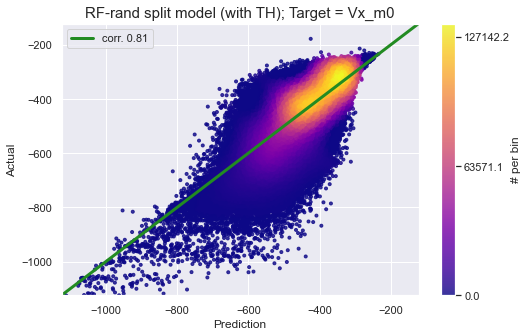

Model Vy_m0 Target Prediction Score: 0.41639736854882625
Mean-squared error = 372.49863227655607
Root-mean-squared error = 19.30022363281203


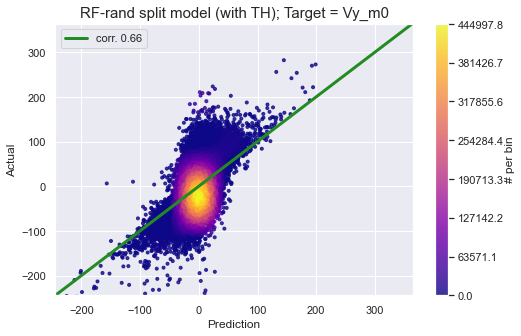

Model Vz_m0 Target Prediction Score: 0.42197641037569256
Mean-squared error = 287.4109731018884
Root-mean-squared error = 16.953199494546404


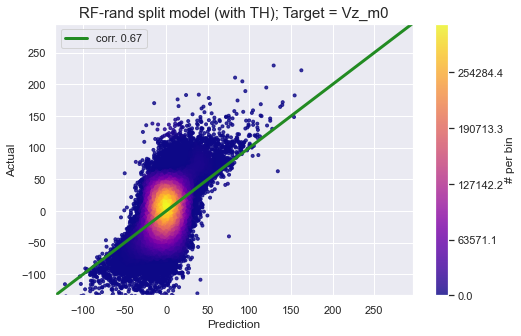

Model proton_density_m0 Target Prediction Score: 0.6386006343626305
Mean-squared error = 9.809955488888907
Root-mean-squared error = 3.1320848470130733


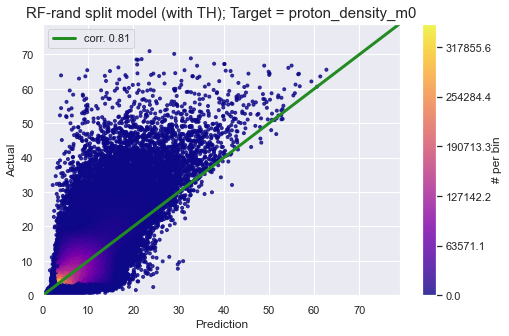

Model T_m0 Target Prediction Score: 0.6154951853971209
Mean-squared error = 3634698530.273745
Root-mean-squared error = 60288.46100435592


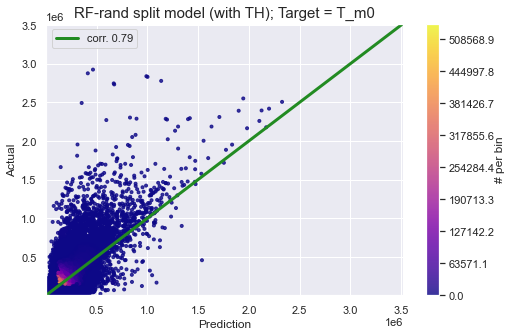

CPU times: total: 53.4 s
Wall time: 50.9 s


In [11]:
%%time
mlm.collective_performance_analysis(y_test,prediction,'RF-rand split model (with TH)')

In [12]:
y_test.describe()

,Vx_m0,Vy_m0,Vz_m0,proton_density_m0,T_m0
count,572140.000000,572140.000000,572140.000000,572140.000000,5.721400e+05
mean,-436.766449,-4.071790,-1.022449,6.235356,9.619224e+04
std,105.986031,25.260065,22.295429,5.209450,9.721466e+04
min,-1133.699951,-600.799988,-243.000000,0.040000,1.342000e+03
25%,-494.700012,-18.600000,-13.800000,3.060000,3.376300e+04
50%,-414.100006,-5.900000,-1.200000,4.740000,6.712800e+04
75%,-357.299988,8.900000,11.500000,7.560000,1.270042e+05
max,-178.500000,281.899994,229.699997,70.959999,2.922878e+06


In [13]:
prediction.describe()

,Vx_m0,Vy_m0,Vz_m0,proton_density_m0,T_m0
count,572140.000000,572140.000000,572140.000000,572140.000000,5.721400e+05
mean,-435.828024,-4.074313,-1.065946,6.113377,9.552327e+04
std,77.495371,12.951793,11.370490,3.482551,6.902675e+04
min,-1124.819983,-244.019998,-133.859999,0.096000,1.941900e+03
25%,-485.540003,-11.350000,-7.570000,3.859000,4.753578e+04
50%,-426.990002,-4.560000,-1.380000,5.197000,8.025500e+04
75%,-377.920001,2.820000,5.100000,7.327000,1.266157e+05
max,-234.690002,198.980001,162.410001,62.708000,2.326371e+06


## Create pickle of RF model

In [14]:
%%time
with open('TH_rf_model.pkl','wb') as f:
    pickle.dump(rf_model,f)

CPU times: total: 2.3 s
Wall time: 5.12 s


In [15]:
%%time 
rf_pkl = open('TH_rf_model.pkl','rb')
rf_modelpkl = pickle.load(rf_pkl)

CPU times: total: 2.88 s
Wall time: 3.19 s


In [16]:
rf_modelpkl

RandomForestRegressor(n_estimators=10, random_state=123)

In [17]:
rf_modelpkl.feature_importances_

array([0.01514778, 0.01197804, 0.00922725, 0.00964143, 0.00912011,
       0.00936812, 0.00880166, 0.00840216, 0.00870769, 0.00926434,
       0.00885968, 0.00865847, 0.00886327, 0.00974259, 0.01249731,
       0.0211653 , 0.01168146, 0.00854214, 0.0071591 , 0.00714839,
       0.00629693, 0.00639522, 0.00605141, 0.00631158, 0.00602108,
       0.00693839, 0.00707031, 0.006625  , 0.00711012, 0.00785359,
       0.00885165, 0.01333154, 0.0260928 , 0.01065497, 0.01102766,
       0.00982369, 0.0099772 , 0.00991296, 0.00910461, 0.00974107,
       0.00859381, 0.01428585, 0.01275847, 0.0096418 , 0.0111118 ,
       0.01242552, 0.01283412, 0.02983796, 0.04273395, 0.01516246,
       0.01458288, 0.00361232, 0.00422189, 0.00672755, 0.00683326,
       0.00417035, 0.00526877, 0.0041417 , 0.00335319, 0.0034755 ,
       0.00381631, 0.00382455, 0.01328419, 0.0413913 , 0.00790083,
       0.00486106, 0.00420748, 0.00342715, 0.0043954 , 0.00346404,
       0.00452287, 0.00326542, 0.00327853, 0.00320122, 0.00307